In [62]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns 
pd.pandas.set_option("display.max_columns", None)

import datetime as dt

import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
# importing datasets

claims = pd.read_csv("claims.csv", parse_dates = ["claim_date"])
cust_demographics = pd.read_csv("cust_demographics.csv", parse_dates = ["DateOfBirth"])

In [3]:
# displaying top few rows of claimns_data
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No


In [4]:
# number of rows & columns in claimns_data

print("Total Number of rows :", claims.shape[0])
print("Total Number of columns :", claims.shape[1])

Total Number of rows : 1100
Total Number of columns : 10


In [5]:
# displaying top few rows of customer_demographics_data
cust_demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,47830476,Female,1986-05-01,MA,413-187-7945,Silver
4,19269962,Male,1977-05-13,NV,956-871-8691,Gold


In [6]:
# number of rows & columns in customer_demographics_data

print("Total Number of rows :", cust_demographics.shape[0])
print("Total Number of columns :", cust_demographics.shape[1])

Total Number of rows : 1085
Total Number of columns : 6


In [7]:
# combining claimns_data & customer_demographics_data to create customer 360.

cust_360 = pd.merge(claims, cust_demographics, left_on="customer_id", right_on="CUST_ID", how="inner")

# display of first 10 rows of customer 360 data
cust_360.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,$1440,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,$2240,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,$38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,$36810,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold


In [8]:
# we can see that we have inappropriate data entries in "DateOfBirth" column
# farmatting the data in appropriate manner

cust_360["DateOfBirth"] = np.where((cust_360.DateOfBirth.dt.year>2059),((cust_360.DateOfBirth)-dt.timedelta(36525)),cust_360.DateOfBirth)

In [9]:
cust_360.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [10]:
# checking for the data types of each columns
cust_360.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [11]:
# here we can see that data type of variable "claim_amount" is assigned inappropriately

### 3. Convert the column claim_amount to numeric. Use appropriate modlues/attribute to remove the sign '$'

In [12]:
cust_360["claim_amount"] = cust_360.claim_amount.str.replace("$","").astype("float")

In [13]:
# data type of variable "claim_amount"

print(cust_360.claim_amount.dtype)

float64


In [14]:
# display of top few rows of cust_360
cust_360.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [15]:
# checking the value counts of variable "polie_report"
# we can see that total 296 claims gone unreported

cust_360.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [16]:
# creating new variable alert_falg for all the 296 claim that have gone unreported.

cust_360["Alert_flag"] = np.where(cust_360.police_report=="Unknown",1,0)

In [17]:
cust_360.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0


### 5. One customer can claim for insurance more than once and in each claim multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [18]:
# duplicate records based on the customer_id 

cust_360[cust_360.customer_id.duplicated()]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1
608,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,84147585,Male,1972-10-18,AK,743-569-4783,Gold,0
610,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,85357756,Male,1970-01-02,PA,915-698-3649,Platinum,1
612,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,53539195,Male,1989-10-02,NV,914-342-8239,Gold,0


In [19]:
# deleting the duplicate records

cust_360 = cust_360.drop_duplicates(subset="customer_id", ignore_index=True)

In [20]:
# all the duplicate records has been deleted 
# there are no duplicattes records left in the data

cust_360.customer_id.duplicated().sum()

0

### 6.Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [21]:
# checking for the missing values

cust_360.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Alert_flag              0
dtype: int64

In [22]:
# we can see that "claim_amount" & "total_policy_claims" have missing values

In [23]:
# checking data types of "claim_amount" & "total_policy_claims"

cust_360[["claim_amount","total_policy_claims"]].dtypes

claim_amount           float64
total_policy_claims    float64
dtype: object

In [24]:
# we can see that both the variables have numeric data type (ie. float64)
# will impute the missing values with the mean values

In [25]:
# imputing these missing values

# method-1 (using replace function)
cust_360["claim_amount"] = cust_360["claim_amount"].replace(np.nan, np.mean(cust_360.claim_amount))

In [26]:
# method-2 (using fillna function)
cust_360["total_policy_claims"] = cust_360["total_policy_claims"].fillna(np.mean(cust_360.total_policy_claims))

In [27]:
cust_360.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

- Children < 18
- Youth 18-30
- Adult 30-60
- Senior > 60

In [28]:
# first will derive Age from DateOfBirth column

# today's date in terms of years 
now = dt.date.today().year

# DateOfBirth in terms of years
dob = cust_360.DateOfBirth.dt.year

# deriving Age variable
cust_360["Age"] = now - dob

In [29]:
cust_360.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,42
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,51
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,37
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,35
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,44


In [30]:
# performing Binning on Age variable
cust_360["Age_category"] = np.where(cust_360.Age<18,"Childer",np.where(cust_360.Age<30,"Youth",np.where(cust_360.Age<60,"Adult","Senior")))

In [31]:
cust_360.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag,Age,Age_category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,42,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,51,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,37,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,35,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,44,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [32]:
# method_1 (using groupby)

seg_wise_claim = cust_360[["Segment","claim_amount"]].groupby(["Segment"]).mean()
seg_wise_claim

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


In [33]:
# method_2 (using pivot table)

seg_wise_claim2 = pd.pivot_table(data=cust_360, index="Segment", values="claim_amount")
seg_wise_claim2

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [34]:
# creating a variable with given date
given_date = "2018-10-01"

# type casting from str to datetime 
given_date = pd.to_datetime(given_date)

# taking 20 days prior date 
prior_20_days = given_date - dt.timedelta(20)

In [35]:
# data with claim_date atleast 20 days prior to 1st October 2018

df_prior = cust_360[cust_360.claim_date < prior_20_days].reset_index(drop=True)

df_prior.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag,Age,Age_category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,42,Adult
1,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,37,Adult
2,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,35,Adult
3,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,44,Adult
4,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0,44,Adult


In [36]:
#total_claim_amount based on incident caused

total_claim_amount = df_prior[["incident_cause","claim_amount"]].groupby("incident_cause").sum().add_prefix("total_")
total_claim_amount

,total_claim_amount
incident_cause,
Crime,7.244625e+05
Driver error,3.264286e+06
Natural causes,1.312706e+06
Other causes,3.725038e+06
Other driver error,3.318806e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [37]:
No_of_Adults = cust_360[(cust_360.Age_category=="Adult") & (cust_360.State.isin(["TX","DE","AK"])) & (cust_360.incident_cause.str.lower().str.contains("driver"))]["Age_category"].count()

print("Total {} adults claimed insurance for driver related issues and causes who are from either TX or DE or AK".format(No_of_Adults))

Total 27 adults claimed insurance for driver related issues and causes who are from either TX or DE or AK


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [38]:
# data based on gender and segment

pie_data = pd.pivot_table(data=cust_360, index="gender", columns="Segment", values="claim_amount")

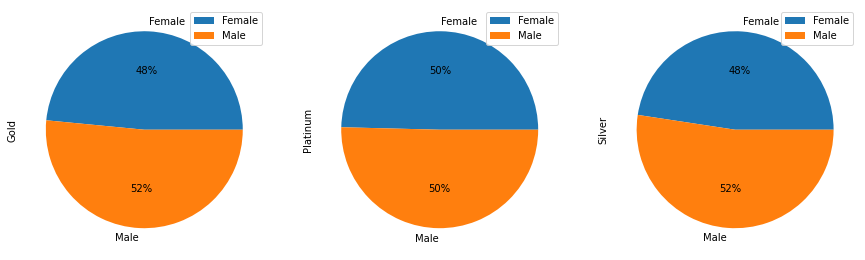

In [39]:
pie_data.plot.pie(subplots=True, figsize=(15,5), autopct="%1.0f%%")
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [40]:
# number of claims by gender

claims_by_gender = cust_360[cust_360.incident_cause.str.lower().str.contains("driver")].groupby(["gender"])[["gender"]].count().add_prefix("count_of_").reset_index()
claims_by_gender

,gender,count_of_gender
0,Female,221
1,Male,280


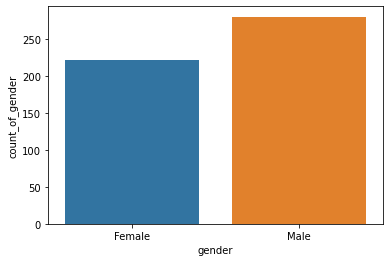

In [41]:
sns.barplot(x="gender", y="count_of_gender", data=claims_by_gender)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [42]:
# data with fradulent policy claims (ie. cust_360.fraudulent=="yes")

fraudulent_data = cust_360[cust_360.fraudulent=="Yes"].reset_index(drop=True)
fraudulent_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag,Age,Age_category
0,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,37,Adult
1,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0,44,Adult
2,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,1966-09-09,RI,165-519-4583,Gold,0,55,Adult
3,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,99103685,Female,1985-12-30,KY,764-439-9856,Gold,0,36,Adult
4,12548447,1407979,Driver error,2018-06-03,Auto,Unknown,Material only,3208.5,1.0,Yes,1407979,Male,1987-03-15,RI,165-217-1648,Silver,1,34,Adult


In [43]:
# fraud count based on Age_categoory

fraud_count = fraudulent_data[["Age_category","fraudulent"]].groupby(["Age_category"]).count().reset_index()
fraud_count

,Age_category,fraudulent
0,Adult,190
1,Senior,12
2,Youth,45


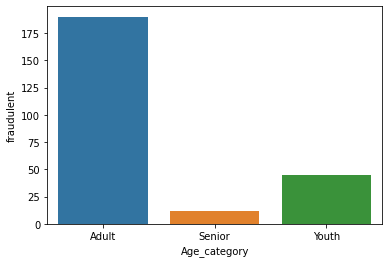

In [44]:
sns.barplot(x="Age_category", y="fraudulent", data=fraud_count)
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [45]:
# monthwise claim_amount

df = pd.pivot_table(data=cust_360, index=(cust_360.claim_date.dt.strftime("%B")), values="claim_amount", aggfunc="sum").reset_index()
df

,claim_date,claim_amount
0,April,1.276071e+06
1,August,9.112035e+05
2,December,6.967015e+05
3,February,1.133107e+06
4,January,1.332012e+06
5,July,1.379035e+06
6,June,1.276333e+06
7,March,1.320094e+06
8,May,1.114211e+06
9,November,6.011250e+05


In [46]:
sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']

In [47]:
# using CategoricalIndex

df.index = pd.CategoricalIndex(df["claim_date"], categories=sort_order, ordered=True)

In [48]:
df = df.sort_index().reset_index(drop=True)

In [49]:
df

,claim_date,claim_amount
0,January,1.332012e+06
1,February,1.133107e+06
2,March,1.320094e+06
3,April,1.276071e+06
4,May,1.114211e+06
5,June,1.276333e+06
6,July,1.379035e+06
7,August,9.112035e+05
8,September,9.806480e+05
9,October,1.422655e+06


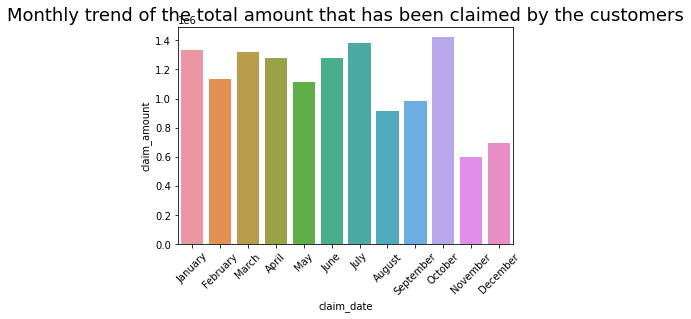

In [50]:
sns.barplot(x="claim_date", y="claim_amount", data=df)
plt.title("Monthly trend of the total amount that has been claimed by the customers", fontsize=18)
plt.xticks(rotation=45)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

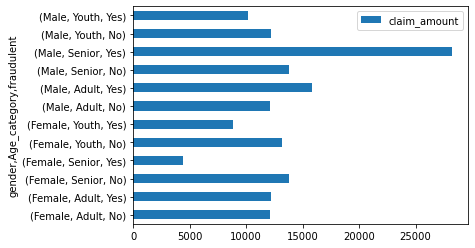

In [56]:
avg_claim = cust_360.groupby(['gender','Age_category','fraudulent'])[['claim_amount']].mean()

avg_claim.plot(kind='barh')
plt.show()

### 16. Is there any similarity in amount claimed by males and females? 

In [69]:
# since we are comparing male & female customers
# will use independent t-test

In [61]:
male = cust_360[cust_360.gender=="Male"]
female = cust_360[cust_360.gender=="Female"]

In [ ]:
# defining hypothesis values

# H0 = amount claimed by males and females are same
# H1 = amount claimed by males and females are different

In [64]:
stats.ttest_ind(male.claim_amount, female.claim_amount)

Ttest_indResult(statistic=0.8848703612768547, pvalue=0.3764242430541366)

#### Conclusion : since pvalue>0.05 so we can't reject null hypothesis.
#### there is a similarity in amount claimed by Males and Females

### 17. Is there any relationship between age category and segment?

In [71]:
cust_360[["Age_category","Segment"]].dtypes

Age_category    object
Segment         object
dtype: object

In [70]:
# since we are looking for relationship b/w 2 categorical variables 
# will use chisquare

In [74]:
# for chisqure we need crosstab

ct = pd.crosstab(cust_360.Age_category, cust_360.Segment)
ct

Segment,Gold,Platinum,Silver
Age_category,,,
Adult,282,265,251
Senior,15,17,17
Youth,74,79,78


In [78]:
# defining hypothesis values

# H0 = There is no relationship 
# H1 = There is relationship 

In [76]:
print(stats.chi2_contingency(ct))

(1.2651334835621246, 0.8672627624214679, 4, array([[274.63636364, 267.23376623, 256.12987013],
       [ 16.86363636,  16.40909091,  15.72727273],
       [ 79.5       ,  77.35714286,  74.14285714]]))


#### Conclusion : since pvalue>0.05 so we can't reject null hypothesis
#### there is a relationship between age category and segment

### 18. The current year has shown significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


In [80]:
# since we are comapring sample average with a hypothetic value
# will use one sample t-test

In [81]:
# defining hypothesis values

# H0 = same
# H1 = Tdifferent

In [85]:
stats.ttest_1samp(cust_360.claim_amount.mean(), 10000)

Ttest_1sampResult(statistic=nan, pvalue=nan)

### 19. Is there any difference between age group and insurance claims? 

In [87]:
cust_360[["Age_category","claim_type"]].dtypes

Age_category    object
claim_type      object
dtype: object

In [88]:
# since we are looking for relationship b/w 2 categorical variables 
# will use chisquare

In [89]:
# for chisqure we need crosstab

ct = pd.crosstab(cust_360.Age_category, cust_360.claim_type)
ct

claim_type,Injury only,Material and injury,Material only
Age_category,,,
Adult,135,185,478
Senior,9,12,28
Youth,49,39,143


In [97]:
# defining hypothesis values

# H0 = There is no difference 
# H1 = There is difference 

In [90]:
print(stats.chi2_contingency(ct))

(5.45716914795111, 0.24352007821563976, 4, array([[142.87012987, 174.7012987 , 480.42857143],
       [  8.77272727,  10.72727273,  29.5       ],
       [ 41.35714286,  50.57142857, 139.07142857]]))


#### Conclusion : since pvalue>0.05 so we can't reject null hypothesis

#### There is a difference between age group and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount? 

In [93]:
cust_360[["total_policy_claims","claim_amount"]].dtypes

total_policy_claims    float64
claim_amount           float64
dtype: object

In [94]:
# since we are looking for relationship b/w 2 numerical variables 
# will use correlation

In [95]:
# defining hypothesis values

# H0 = There is no relationship 
# H1 = There is relationship 

In [96]:
stats.pearsonr(cust_360.total_policy_claims,cust_360.claim_amount)

(-0.014291136186627362, 0.6392846937920396)

#### Conclusion : since pvalue>0.05 so we can't reject null hypothesis

#### There is np relationship between age group and insurance claims